In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("Tesla.csv")
df

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600,255.729996
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400,262.049988


In [7]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


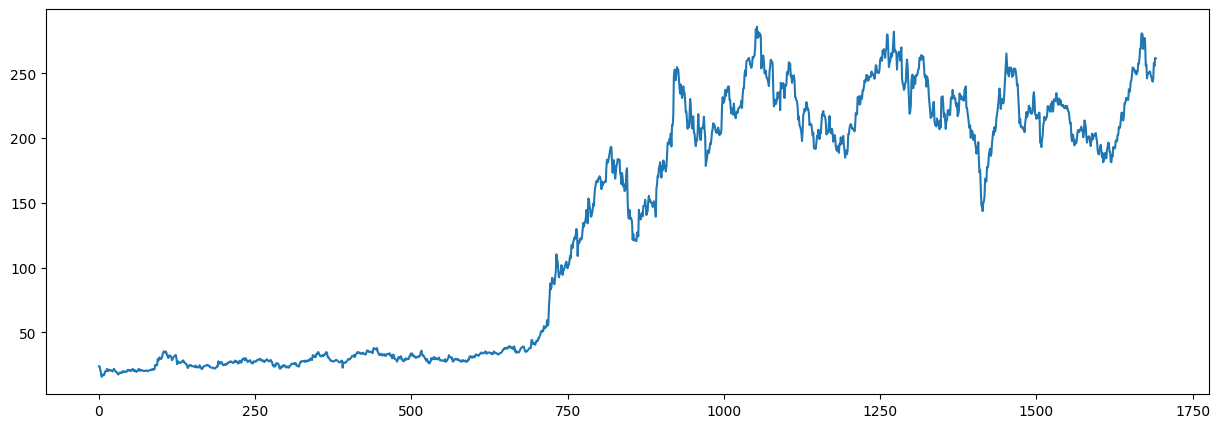

In [15]:
plt.figure(figsize=(15,5))
plt.plot(df["Close"])
plt.show()

In [17]:
df[df["Close"]==df["Adj Close"]].shape

(1692, 7)

In [21]:
df=df.drop(["Adj Close"],axis=1)
df

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400


In [23]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

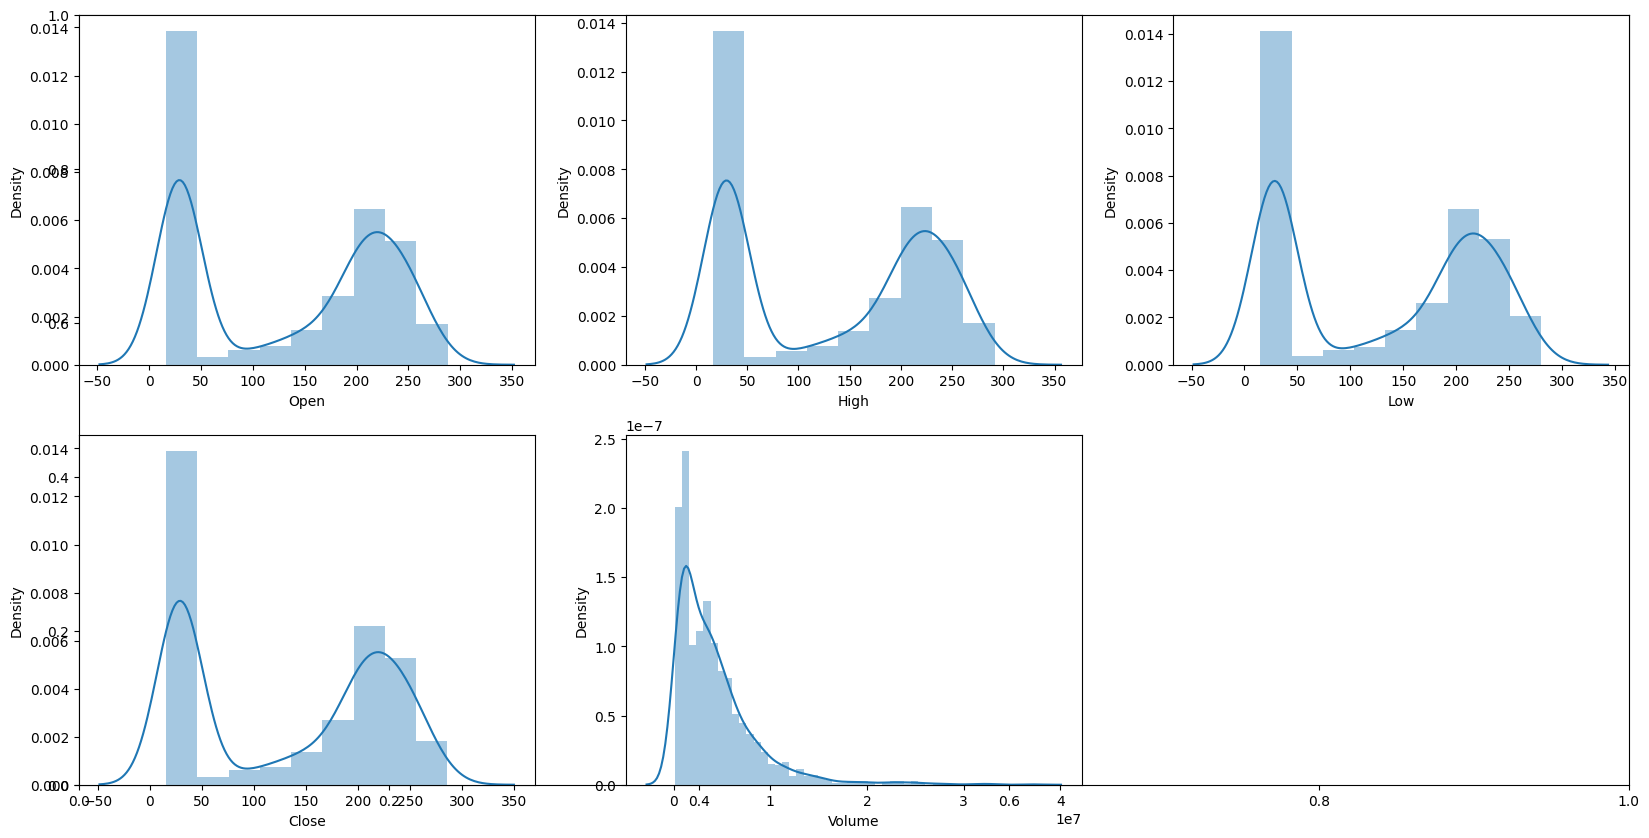

In [25]:
features=['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()